In [5]:
from collections import defaultdict
from typing import List
import math

In [1]:
from collections import deque


def min_fuel_required(roads, capacity):
    # Initialize variables to track fuel consumption and visited cities
    fuel_required = 0
    visited = set()

    # Create a queue for BFS traversal, initialize with city 0
    queue = deque([(0, capacity)])

    while queue:
        current_city, current_capacity = queue.popleft()

        # Check if the current city has already been visited
        if current_city in visited:
            continue

        # Mark the current city as visited
        visited.add(current_city)

        # Check if the current city has a pizza shop
        if current_city != 0:
            # Calculate fuel required to deliver pizzas from this city to the event
            fuel_required += 1

        # Explore neighboring cities connected by roads
        for road in roads:
            if current_city in road:
                neighbor = road[0] if road[0] != current_city else road[1]

                # Check if the neighbor city has not been visited and if there's enough capacity
                if neighbor not in visited and current_capacity > 0:
                    # Deduct the capacity used for delivering pizzas in this city
                    new_capacity = current_capacity - 1 if current_city != 0 else capacity
                    queue.append((neighbor, new_capacity))

    return fuel_required


# Test cases
roads1 = [[0, 1], [0, 2], [0, 3]]
capacity1 = 5
print(min_fuel_required(roads1, capacity1))  # Output: 3

roads2 = [[3, 1], [3, 2], [1, 0], [0, 4], [0, 5], [4, 6]]
capacity2 = 2
print(min_fuel_required(roads2, capacity2))  # Output: 7

3
6


In [6]:
def minimumFuelCost(roads: List[List[int]], capacity: int) -> int:
    adjacency_list = defaultdict(list)
    for a, b in roads:
        adjacency_list[a].append(b)
        adjacency_list[b].append(a)
    total_fuel_cost = [0]

    def dfs(node, parent):
        people = 1
        for neighbor in adjacency_list[node]:
            if neighbor == parent:
                continue
            people += dfs(neighbor, node)
        if node != 0:
            total_fuel_cost[0] += math.ceil(people / capacity)
        return people
    dfs(0, None)
    return total_fuel_cost[0]

Generated roads: [[1, 0], [2, 1], [3, 2]]


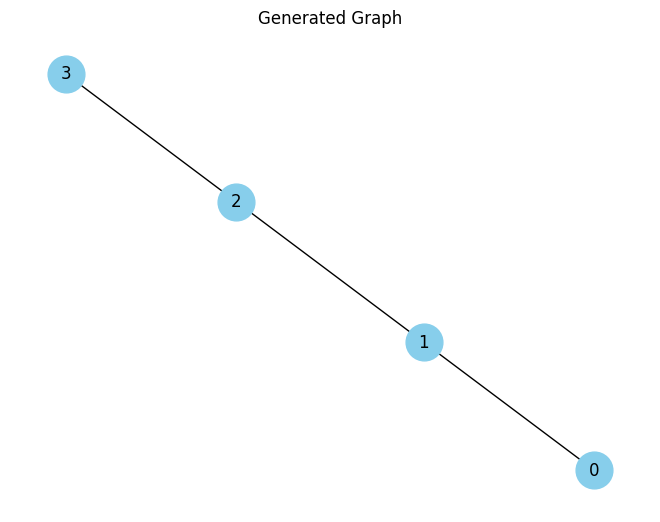

3

In [9]:
import random
import networkx as nx
import matplotlib.pyplot as plt


def generate_roads(length):
    roads = []
    for i in range(1, length):
        node = random.randint(0, i - 1)
        roads.append([i, node])
    return roads


def visualize_graph(roads):
    G = nx.Graph()
    for road in roads:
        G.add_edge(road[0], road[1])
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700)
    plt.title("Generated Graph")
    plt.show()


# Example usage:
length = 4
roads = generate_roads(length)
print("Generated roads:", roads)
visualize_graph(roads)
minimumFuelCost(roads=roads, capacity=20)

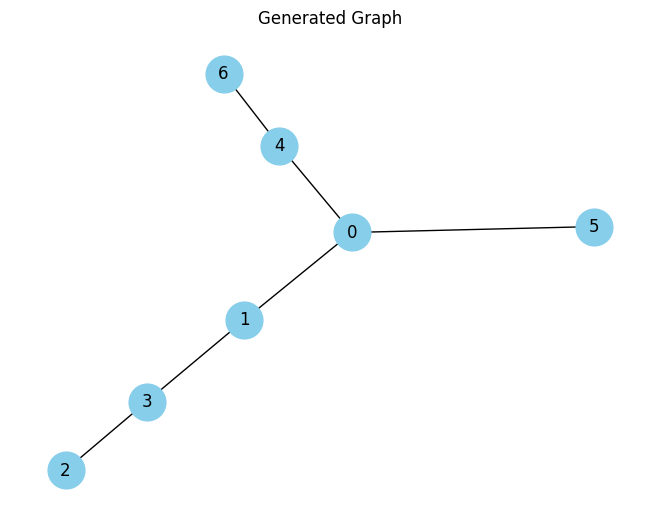

6
7


In [10]:
roads, capacity = [[3, 1], [3, 2], [1, 0], [0, 4], [0, 5], [4, 6]], 2
visualize_graph(roads)
print(min_fuel_required(roads=roads, capacity=capacity))
print(minimumFuelCost(roads=roads, capacity=capacity))